Code below is for covid-19 plot in flyer for Oregon State BDS 311
To re-create plots, you will need to download us.csv and us-states.csv from
https://github.com/nytimes/covid-19-data

Data locations on local machine are specified by 
'us_data_location' and 'states_data_location' variables in scripts below.

e.g.

us_data_location='/users/tim/python_packages/covid-19-data/us.csv'
states_data_location='/users/tim/python_packages/covid-19-data/us-states.csv'


In [1]:
# adjust_spines useful for plot below
#From https://matplotlib.org/3.1.1/gallery/ticks_and_spines/spine_placement_demo.html
def adjust_spines(ax,spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))  # outward by 10 points
            spine.set_smart_bounds(False)
        else:
            spine.set_color('none')  # don't draw spine

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        # no yaxis ticks
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        # no xaxis ticks
        ax.xaxis.set_ticks([])

In [2]:
##movingaverage useful for analysis
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'valid')

#populations, useful for plotting per 100,000 residents

pop={}
pop['us']=323823952.
pop['benton']=93053.
pop['Oregon']=4217737.
pop['Montana']=1068778
pop['Nevada']=3080156
pop['California']=39512223
pop['Idaho']=1787065
pop['New York']=19453561
pop['Washington']=7614893

In [3]:
##1. download states and do preliminary analysis
#states_for_analysis=['Oregon', 'Washington', 'New York', 'California', 'Nevada', 'Idaho', 'Montana']
states_for_analysis=['Oregon',  'California', 'Nevada', 'Idaho']
us_data_location='/users/tim/python_packages/covid-19-data/us.csv'
states_data_location='/users/tim/python_packages/covid-19-data/us-states.csv'
alldt={}
ave_arrays={}
date_arrays={}
len_arrays=[]
scale_factor=1e5
import numpy as np
import datetime
alldt['us']=np.genfromtxt(us_data_location,delimiter=',',dtype=str)
float_us_array=alldt['us'][1:,1].astype(int)
diff_us_array=np.diff(float_us_array)
ave_arrays['us']=scale_factor*movingaverage(diff_us_array,7)/pop['us']
date_arrays['us']=[datetime.datetime.strptime(crstr,'%Y-%m-%d') for crstr in alldt['us'][1:,0]]
len_us=len(ave_arrays['us'])

alldt_states=np.genfromtxt(states_data_location,delimiter=',',dtype=str)
state_list=alldt_states[:,1]

for crstatekey in states_for_analysis:
    
    crinds=np.where(state_list==crstatekey)[0]
    
    float_array=alldt_states[crinds,3].astype(int)
    diff_array=np.diff(float_array)
    
    date_arrays[crstatekey]=[datetime.datetime.strptime(crstr,'%Y-%m-%d') for crstr in alldt_states[crinds,0]]
   
    ave_arrays[crstatekey]=scale_factor*movingaverage(diff_array,7)/pop[crstatekey]
    len_arrays.append(len(ave_arrays[crstatekey]))


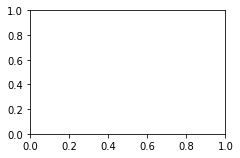

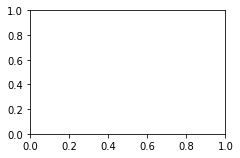

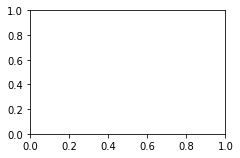

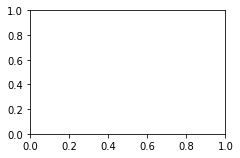

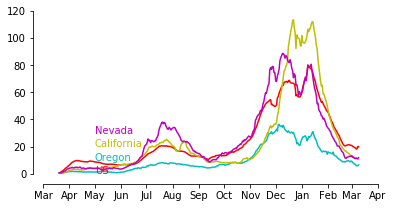

In [9]:
%matplotlib inline
HEAT_MAP_FLAG=False
MAKE_TIME_TRACE=True

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.show()
minlen=np.min(len_arrays)
dat_all=np.zeros((len(states_for_analysis)+1,minlen))
#date_all=np.zeros((len(states_for_analysis)+1,minlen))
startvl=len_us-minlen
dat_all[0,:]=ave_arrays['us'][startvl:]
state_list=['US']
colors='rcymk'
#date_all=
for state_ind,crstatekey in enumerate(states_for_analysis):
    

    fig=plt.figure()
    fig.set_size_inches(3.5,5 )
    ax=plt.subplot(211)
    crlen=len(ave_arrays[crstatekey])
#newyork_len=len(ave_newyork_array)
#us_len=len(ave_us_array)

    xinds=np.arange(minlen)
   
    startvl=crlen-minlen
    date_start=len(date_arrays[crstatekey])-len(ave_arrays[crstatekey])
    state_list.append(crstatekey)
    dat_all[state_ind+1,:]=ave_arrays[crstatekey][startvl:]
    dates_to_plot=date_arrays[crstatekey][startvl+date_start:]
if HEAT_MAP_FLAG:
    from astropy.visualization import simple_norm
    fig=plt.figure()
    fig.set_size_inches(6,6 )
    ax=plt.subplot(211)
    norm = simple_norm(dat_all, 'log')
    plt.hot()

    im=ax.imshow(dat_all)
    im.set_clim(0.5,35) 
    ax.set_aspect(10)
    plt.colorbar(im)

    ax.yaxis.grid()

if MAKE_TIME_TRACE:
    fig=plt.figure()
    fig.set_size_inches(6,3)
    text_pltx=datetime.date(2020, 5, 1)
    ax=plt.gca()
    month_locator=mdates.MonthLocator()
    fmt=mdates.DateFormatter('%b')
    for st_ind,pltnum in enumerate(states_for_analysis):
        crcol=colors[st_ind]
        plt.plot(mdates.date2num(dates_to_plot),dat_all[st_ind,:],crcol)
        if state_ind:
            ax.text(text_pltx,10*st_ind,state_list[st_ind],color=crcol)
    ax.xaxis.set_major_locator(month_locator)
    ax.xaxis.set_major_formatter(fmt)
    ax.set_xlim([datetime.date(2020, 3, 1), datetime.date(2021, 4, 1)])
    ax.set_ylim(0, 120)
    adjust_spines(ax,['left','bottom'])
    plt.savefig("flyer_covid_traces.pdf", transparent=True)



In [5]:
pop

{'us': 323823952.0,
 'benton': 93053.0,
 'Oregon': 4217737.0,
 'Montana': 1068778,
 'Nevada': 3080156,
 'California': 39512223,
 'Idaho': 1787065,
 'New York': 19453561,
 'Washington': 7614893}